<a href="https://colab.research.google.com/github/mshojaei77/AdvancedWebScraper/blob/main/Copy_of_openai_gpt_4o_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# OpenAI GPT-4o fine-tuning
---

## Setup

### Configure your API keys

To fine-tune GPT-4o, you need to provide your OpenAI API key and Roboflow API key. Follow these steps:

- Open your [`OpenAI Settings`](https://platform.openai.com/settings) page. Click `User API keys` then `Create new secret key` to generate new token.
- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑).
    - Store OpenAI API key under the name `OPENAI_API_KEY`.
    - Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Install dependencies

In [ ]:
!pip install -q openai roboflow supervision maestro==0.2.0rc5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.2 MB/s eta 0:00:00
   ━━━━━━

## Download dataset

In [ ]:
from roboflow import Roboflow
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("roboflow-jvuqo")
project = workspace.project("poker-cards-fmjio")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to poker-cards-4 in yolov8:: 100%|██████████| 1810/1810 [00:00<00:00, 4912.84it/s]


In [ ]:
import supervision as sv

ds_train = sv.DetectionDataset.from_yolo(
    images_directory_path=f'{dataset.location}/train/images',
    annotations_directory_path=f'{dataset.location}/train/labels',
    data_yaml_path=f'{dataset.location}/data.yaml'
)
ds_valid = sv.DetectionDataset.from_yolo(
    images_directory_path=f'{dataset.location}/valid/images',
    annotations_directory_path=f'{dataset.location}/valid/labels',
    data_yaml_path=f'{dataset.location}/data.yaml'
)
ds_test = sv.DetectionDataset.from_yolo(
    images_directory_path=f'{dataset.location}/test/images',
    annotations_directory_path=f'{dataset.location}/test/labels',
    data_yaml_path=f'{dataset.location}/data.yaml'
)

print(ds_train.classes)
print(len(ds_train), len(ds_valid), len(ds_test))

['10 of clubs', '10 of diamonds', '10 of hearts', '10 of spades', '2 of clubs', '2 of diamonds', '2 of hearts', '2 of spades', '3 of clubs', '3 of diamonds', '3 of hearts', '3 of spades', '4 of clubs', '4 of diamonds', '4 of hearts', '4 of spades', '5 of clubs', '5 of diamonds', '5 of hearts', '5 of spades', '6 of clubs', '6 of diamonds', '6 of hearts', '6 of spades', '7 of clubs', '7 of diamonds', '7 of hearts', '7 of spades', '8 of clubs', '8 of diamonds', '8 of hearts', '8 of spades', '9 of clubs', '9 of diamonds', '9 of hearts', '9 of spades', 'ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'jack  of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades']
811 44 44


In [ ]:
URL_PREFIX = "https://storage.googleapis.com/com-roboflow-marketing/gpt-4o-fine-tuning/poker-cards/"


def use_template(prefix: str, suffix: str, image: str) -> dict:
    return {
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prefix},
            {
                "role": "user",
                "content": [
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": image
                        }
                    }
                ]
            },
            {
                "role": "assistant",
                "content": suffix
            }
        ]
    }

In [ ]:
import numpy as np

def process_prefix(prefix: str, class_ids: np.ndarray, classes: list[str], separator: str = ';') -> str:
    """
    Constructs a string where a prefix appears once at the beginning followed by
    class names corresponding to the class IDs, separated by the specified separator.

    Args:
        prefix (str): The string to prepend before the class names.
        class_ids (np.ndarray): Array of integers representing the class IDs.
        classes (list[str]): List of class names corresponding to the IDs.
        separator (str, optional): Separator used between class names. Defaults to ';'.

    Returns:
        str: A single string starting with the prefix followed by class names.
    """
    selected_classes = [classes[i] for i in class_ids]
    return f"{prefix} " + separator.join(selected_classes)

In [ ]:
import numpy as np

def process_suffix(detections, image: np.ndarray, classes: list[str], separator: str = ';') -> str:
    """
    Constructs a string where class names are followed by their normalized bounding box
    locations, separated by the specified separator.

    Args:
        detections: Object containing detection results with 'xyxy' (bounding boxes),
            'class_id' (class IDs), and 'image_shape' (height, width, channels).
        classes (list[str]): List of class names corresponding to the class IDs.
        separator (str, optional): Separator used between class entries. Defaults to ';'.

    Returns:
        str: A string of class names with their corresponding bounding box locations.
    """
    xyxy = detections.xyxy
    class_id = detections.class_id
    h, w, _ = image.shape

    x_centers = (xyxy[:, 0] + xyxy[:, 2]) / 2
    y_centers = (xyxy[:, 1] + xyxy[:, 3]) / 2
    idx = np.lexsort((y_centers, x_centers))

    sorted_xyxy = xyxy[idx] / np.array([w, h, w, h]) * 1024
    sorted_xyxy = sorted_xyxy.astype(int)
    sorted_class_id = class_id[idx]

    entries = [
        f"<loc{y_min:04d}><loc{x_min:04d}><loc{y_max:04d}><loc{x_max:04d}> {classes[id]}"
        for id, (x_min, y_min, x_max, y_max) in zip(sorted_class_id, sorted_xyxy)
    ]

    return separator.join(entries)

In [ ]:
import os

def process_path(path: str, prefix: str) -> str:
    """
    Takes a file path and a URL prefix, and replaces the local part of the path up to
    the folder of interest (like 'train/images') with the prefix.

    Args:
        path (str): The local file path.
        prefix (str): The URL prefix to prepend to the remaining path.

    Returns:
        str: The final URL with the prefix and cleaned-up path.
    """
    # Extract the part of the path starting from 'train/images' or another folder of interest
    cleaned_path = os.path.join(*path.split('/')[-3:])  # Keeps only the last 3 parts

    # Concatenate the prefix with the cleaned-up path
    return prefix + cleaned_path

In [ ]:
from math import e
import json
from pathlib import Path
from tqdm import tqdm

def save_entries_as_jsonl(entries: list, path: Path) -> None:
    with open(path, 'w') as f:
        for i, entry in enumerate(tqdm(entries, desc=f"saving entries to {path}")):
            json.dump(entry, f)
            if i < len(entries) - 1:
                f.write('\n')



def dataset_as_jsonl(dataset, annotations_file: str, max_count: int = None) -> None:
    """
    Saves the dataset in JSONL format by processing the images, detections, and paths.

    Args:
        dataset: The dataset containing image paths, image data, and detection results.
        annotations_file (str): The path where the JSONL file will be saved.
        max_count (int, optional): Maximum number of dataset entries to process. If None, processes the entire dataset.

    Returns:
        None
    """
    entries = []
    total_entries = len(dataset) if max_count is None else min(len(dataset), max_count)

    for i in tqdm(range(total_entries), desc=f"saving images at {annotations_file}"):
        path, image, detections = dataset[i]
        prefix = process_prefix(
            prefix='detect',
            class_ids=detections.class_id,
            classes=dataset.classes
        )
        suffix = process_suffix(
            detections=detections,
            image=image,
            classes=dataset.classes
        )
        image = process_path(path=path, prefix=URL_PREFIX)
        entry = use_template(prefix=prefix, suffix=suffix, image=image)
        entries.append(entry)

    save_entries_as_jsonl(entries=entries, path=annotations_file)

In [ ]:
dataset_as_jsonl(ds_train, "_annotations.train.jsonl")
dataset_as_jsonl(ds_valid, "_annotations.valid.jsonl")
dataset_as_jsonl(ds_test, "_annotations.test.jsonl")

saving entries to _annotations.test.jsonl: 100%|██████████| 44/44 [00:00<00:00, 12576.62it/s]


In [ ]:
!head -n 1 _annotations.train.jsonl

{"messages": [{"role": "system", "content": "You are a helpful assistant."}, {"role": "user", "content": "detect 5 of clubs;6 of clubs;7 of clubs;8 of clubs"}, {"role": "user", "content": [{"type": "image_url", "image_url": {"url": "https://storage.googleapis.com/com-roboflow-marketing/gpt-4o-fine-tuning/poker-cards/train/images/IMG_20220316_171910_jpg.rf.67e90b2c612507e2494e201fb4f4c305.jpg"}}]}, {"role": "assistant", "content": "<loc0000><loc0183><loc0394><loc0504> 6 of clubs;<loc0164><loc0367><loc0588><loc0671> 8 of clubs;<loc0380><loc0482><loc0829><loc0792> 5 of clubs;<loc0478><loc0674><loc0936><loc0975> 7 of clubs"}]}


## Run GPT-4o fine-tuning

**NOTE:** At the time of publishing this notebook, only the `gpt-4o-2024-08-06` model can be fine-tuned with vision datasets.

In [ ]:
# @title Initiate OpenAI client

from openai import OpenAI
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

client = OpenAI(api_key=OPENAI_API_KEY)

In [ ]:
# @title Upload a training and validation file

training_file_upload_response = client.files.create(
  file=open("_annotations.train.jsonl", "rb"),
  purpose="fine-tune"
)

validation_file_upload_response = client.files.create(
  file=open("_annotations.valid.jsonl", "rb"),
  purpose="fine-tune"
)

print("treaining file response:", training_file_upload_response)
print("validation file response:", validation_file_upload_response)

treaining file response: FileObject(id='file-OeucFR8fKMF68qdJ9yCSESPv', bytes=548592, created_at=1727908593, filename='_annotations.train.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)
validation file response: FileObject(id='file-uo8nWSYWdo51SF9XodisEn6K', bytes=30011, created_at=1727908594, filename='_annotations.valid.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)


In [ ]:
# @title Create a fine-tuned model

import re

def process_suffix(text: str) -> str:
    """
    Converts a string into kebab-case, where spaces are replaced with hyphens
    and all letters are lowercase.

    Args:
        text (str): The input string to be converted. Typically, words are
          separated by spaces.

    Returns:
        str: The kebab-case version of the input string, where spaces are
          replaced by hyphens and the text is lowercase.

    Example:
        >>> process_suffix("Focal Length")
        'focal-length'
    """
    return re.sub(r'\s+', '-', text.strip()).lower()


fine_tuning_response = client.fine_tuning.jobs.create(
    training_file=training_file_upload_response.id,
    validation_file=validation_file_upload_response.id,
    suffix=process_suffix(dataset.name),
    model="gpt-4o-2024-08-06"
)

fine_tuning_response

FineTuningJob(id='ftjob-2UYwRHDQXjm1qBG88RqCEeRB', created_at=1727908609, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-4o-2024-08-06', object='fine_tuning.job', organization_id='org-sLGE3gXNesVjtWzgho17NkRy', result_files=[], seed=667206240, status='validating_files', trained_tokens=None, training_file='file-OeucFR8fKMF68qdJ9yCSESPv', validation_file='file-uo8nWSYWdo51SF9XodisEn6K', estimated_finish=None, integrations=[], user_provided_suffix='poker-cards')

⚠️ After you've started a fine-tuning job, it may take some time to complete. Your job may be queued behind other jobs in our system, and training a model can take minutes or hours depending on the model and dataset size. After the model training is completed, the user who created the fine-tuning job will receive an email confirmation.

In addition to creating a fine-tuning job, you can also list existing jobs, retrieve the status of a job, or cancel a job.

In [ ]:
# @title Check training job status

status_response = client.fine_tuning.jobs.retrieve(fine_tuning_response.id)

status_response

FineTuningJob(id='ftjob-2UYwRHDQXjm1qBG88RqCEeRB', created_at=1727908609, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-2024-08-06:personal:poker-cards:AE3XHdn2', finished_at=1727913545, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=2), model='gpt-4o-2024-08-06', object='fine_tuning.job', organization_id='org-sLGE3gXNesVjtWzgho17NkRy', result_files=['file-Kk8dqKdelvneesBc9uVWfLdZ'], seed=667206240, status='succeeded', trained_tokens=2076033, training_file='file-OeucFR8fKMF68qdJ9yCSESPv', validation_file='file-uo8nWSYWdo51SF9XodisEn6K', estimated_finish=None, integrations=[], user_provided_suffix='poker-cards')

**NOTE:** When the training status changes to `succeeded`, the model is ready to use.

In [ ]:
# @title Load test dataset

import random
from torch.utils.data import Dataset
from maestro.trainer.common.utils.file_system import read_jsonl

class JSONLDataset(Dataset):
    """A dataset class for loading and managing JSONL data in a PyTorch-compatible format.

    This class allows loading JSONL files, shuffling the data, and accessing
    individual data points using standard PyTorch Dataset interfaces.
    """

    @classmethod
    def from_jsonl_file(cls, path: str):
        """Loads data from a JSONL file, shuffles it, and returns a dataset instance.

        Args:
            path (str): The file path to the JSONL file.

        Returns:
            JSONLDataset: An instance of the JSONLDataset class loaded with the JSON data.
        """
        file_content = read_jsonl(path=path)
        random.shuffle(file_content)
        return cls(jsons=file_content)

    def __init__(self, jsons: list[dict]) -> None:
        """Initializes the dataset with a list of JSON objects.

        Args:
            jsons (list[dict]): A list of JSON objects, each represented as a dictionary.
        """
        self.jsons = jsons

    def __getitem__(self, index):
        """Fetches a specific item from the dataset.

        Args:
            index (int): The index of the item to retrieve.

        Returns:
            dict: A dictionary representing the JSON object at the specified index.
        """
        return self.jsons[index]

    def __len__(self) -> int:
        """Returns the number of items in the dataset.

        Returns:
            int: The total number of JSON objects in the dataset.
        """
        return len(self.jsons)

    def shuffle(self) -> None:
        """Shuffles the JSON objects in the dataset.

        This method modifies the dataset in place, changing the order of the JSON objects.
        """
        random.shuffle(self.jsons)


def extract_image_url(data):
    """Extracts the first image URL from a list of messages in a dataset.

    The function searches through messages to find an image URL
    where the 'role' is 'user' and 'content' is a list containing items
    with a 'type' of 'image_url'.

    Args:
        data (list[dict]): A list of message dictionaries.

    Returns:
        str or None: The image URL if found, otherwise None.
    """
    for message in data:
        if message['role'] == 'user' and isinstance(message['content'], list):
            for item in message['content']:
                if item.get('type') == 'image_url':
                    return item['image_url']['url']
    return None


test_dataset = JSONLDataset.from_jsonl_file("_annotations.test.jsonl")

**NOTE:** When querying the model, we need to remove the last element of the messages list, which contains the expected model response.

In [ ]:
test_dataset[0]['messages']

[{'role': 'system', 'content': 'You are a helpful assistant.'},
 {'role': 'user',
  'content': 'detect 5 of spades;6 of spades;7 of spades;8 of spades'},
 {'role': 'user',
  'content': [{'type': 'image_url',
    'image_url': {'url': 'https://storage.googleapis.com/com-roboflow-marketing/gpt-4o-fine-tuning/poker-cards/test/images/IMG_20220316_140241_jpg.rf.c44522806b5455bfb03a638aa3ffa896.jpg'}}]},
 {'role': 'assistant',
  'content': '<loc0418><loc0307><loc0688><loc0414> 5 of spades;<loc0389><loc0380><loc0704><loc0500> 6 of spades;<loc0342><loc0467><loc0764><loc0638> 7 of spades;<loc0241><loc0612><loc0849><loc0901> 8 of spades'}]

In [ ]:
# @title Run inference using fine-tuned model

completion = client.chat.completions.create(
    model=status_response.fine_tuned_model,
    messages=test_dataset[0]['messages'][:-1]
)

completion.choices[0].message

ChatCompletionMessage(content='<loc0360><loc0268><loc0636><loc0377> 5 of spades;<loc0328><loc0344><loc0667><loc0480> 6 of spades;<loc0280><loc0433><loc0756><loc0623> 7 of spades;<loc0232><loc0607><loc0857><loc0882> 8 of spades', refusal=None, role='assistant', function_call=None, tool_calls=None)

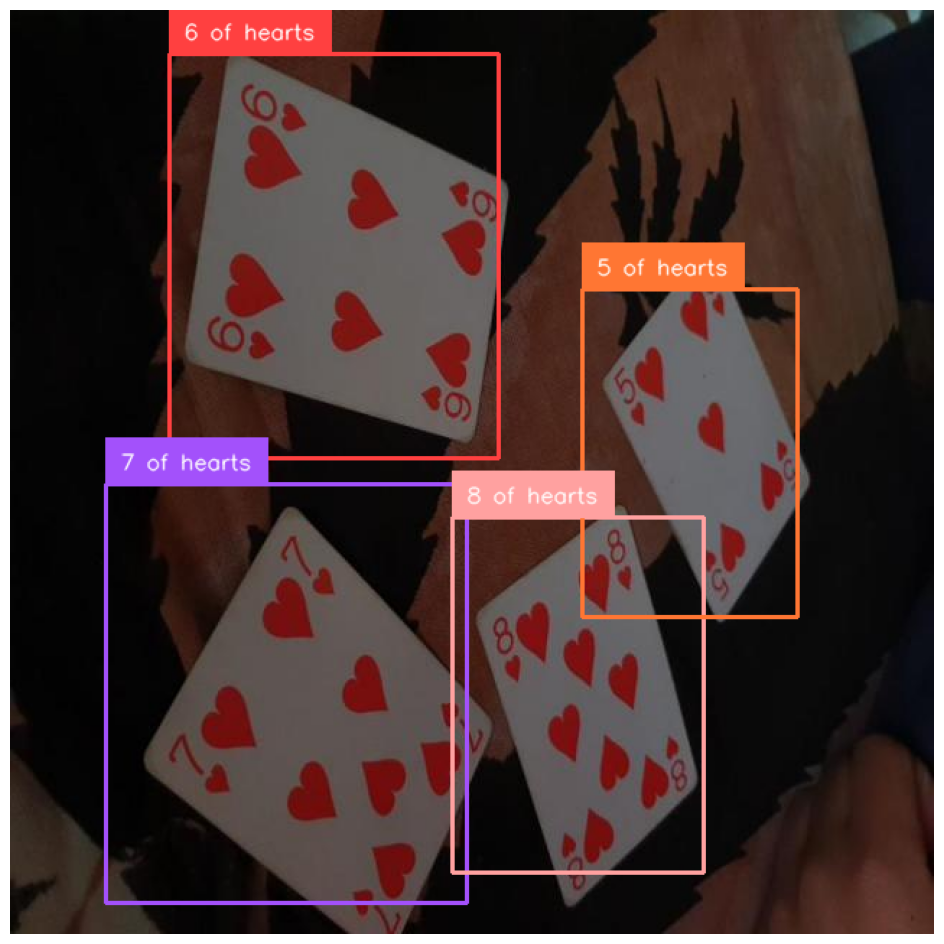

In [ ]:
# @title Post-process inference result

import requests
import supervision as sv
from PIL import Image

URL = extract_image_url(test_dataset[0]['messages'])

image = Image.open(requests.get(URL, stream=True).raw)
detections = sv.Detections.from_lmm(
    lmm=sv.LMM.PALIGEMMA,
    result=completion.choices[0].message.content,
    resolution_wh=image.size
)

box_annotator = sv.BoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(
    scene=image,
    detections=detections
)
annotated_image = label_annotator.annotate(
    scene=annotated_image,
    detections=detections
)

sv.plot_image(annotated_image)

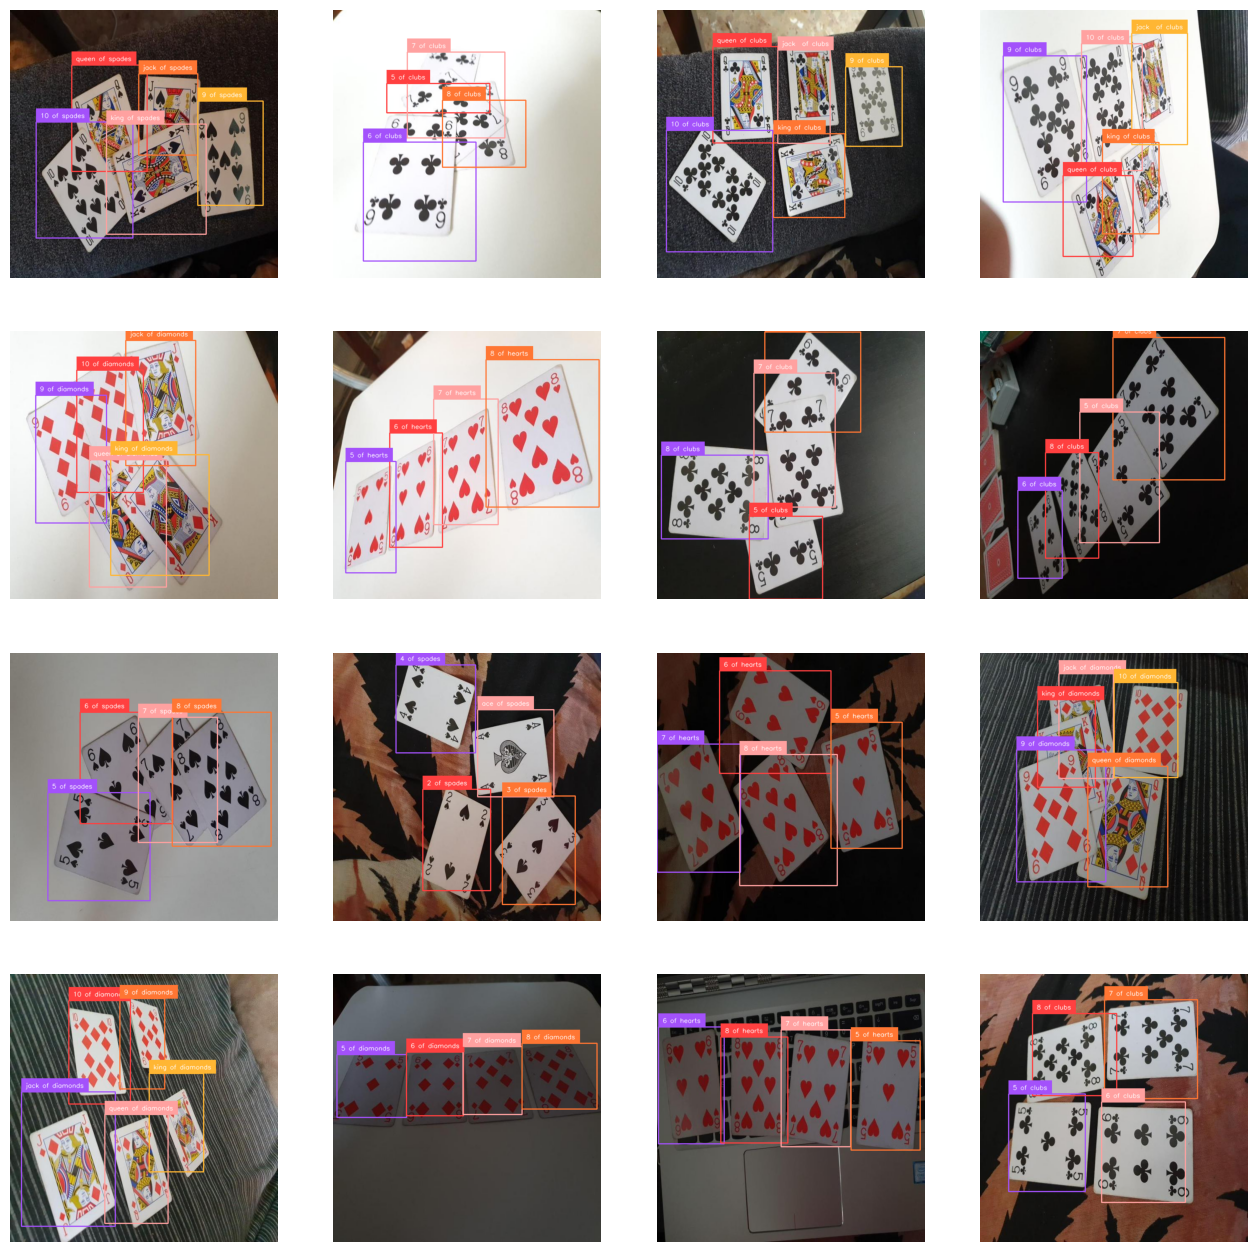

In [ ]:
# @title Run inference on multiple images

SAMPLE = 16

annotated_images = []

for i in tqdm(range(SAMPLE)):
    completion = client.chat.completions.create(
        model=status_response.fine_tuned_model,
        messages=test_dataset[i]['messages'][:-1]
    )

    url = extract_image_url(test_dataset[i]['messages'])

    image = Image.open(requests.get(url, stream=True).raw)
    detections = sv.Detections.from_lmm(
        lmm=sv.LMM.PALIGEMMA,
        result=completion.choices[0].message.content,
        resolution_wh=image.size
    )

    box_annotator = sv.BoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
    label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(
        scene=image,
        detections=detections
    )
    annotated_image = label_annotator.annotate(
        scene=annotated_image,
        detections=detections
    )
    annotated_images.append(annotated_image)

sv.plot_images_grid(annotated_images, grid_size=(4, 4), size=(16, 16))